# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel("customer_churn.xlsx", sheet_name="in")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1\. Explore and pre-process the dataset.

## Exploring

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='Churn', ylabel='Count'>

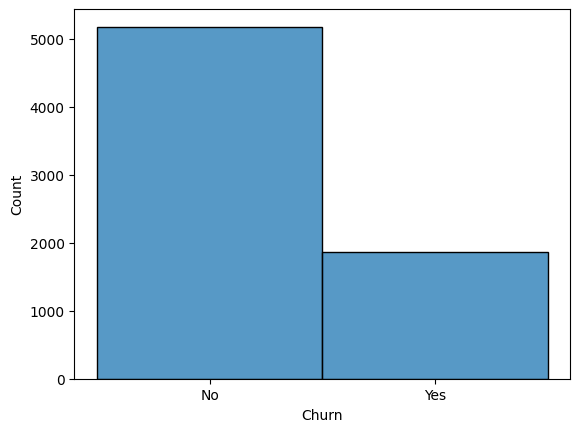

In [ ]:
sns.histplot(x='Churn', data=df)

จะเห็นได้ว่า churn เป็นข้อมูลแบบ imbalanced และเปลี่ยนข้อมูล TotalCharges เป็น numerical

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Pre-processing

drop customerID และ drop ข้อมูลที่ว่างทิ้งไป

In [ ]:
df.drop(columns = 'customerID',axis=1, inplace = True)

In [ ]:
df.dropna(inplace=True)

ทำการแบ่ง X, y โดย y คือข้อมูลการ Churn และ X คือข้อมูลที่เหลือ

In [ ]:
y = df['Churn']
df.drop('Churn', axis=1 , inplace=True)

In [ ]:
categorical_features = df.select_dtypes("object").columns
categorical_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
X = df_encoded

In [ ]:
X_original = X.values
y_original = y.values

# 2\. Use cross-validation, and build a model to predict churn rate. It can be any kind of model, or it could be a model that you haven't seen in the class.

In [ ]:
y.value_counts()

,count
Churn,
No,5163
Yes,1869


ทำ cross-validation ด้วย DecisionTree

In [ ]:
from sklearn.model_selection import KFold , cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline
from math import log2 , ceil
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = ceil(log2(len(df.columns))), criterion = 'entropy', random_state = 0)
model.fit(X_original, y_original)
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])

# evaluate model
cv = KFold(n_splits=10)
n_scores = cross_val_score(pipeline, X_original, y_original, cv=cv, n_jobs=-1, error_score='raise')
# fit the model on all available data
pipeline.fit(X_original, y_original)

Pipeline(steps=[('scaler', StandardScaler()),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=0))])

In [ ]:
y_pred = cross_val_predict(pipeline,X_original,y_original,cv=cv)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
n_scores.mean()

0.7908114978016293

# 3. Once the model is built,

## Show the confusion-matrix

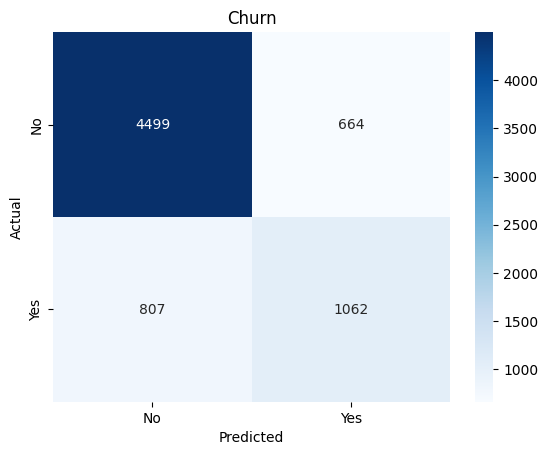

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_original , y_pred , labels=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Analyze precision, recall and f1-score of the two classes.

In [ ]:
report = classification_report(y_original, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      5163
         Yes       0.62      0.57      0.59      1869

    accuracy                           0.79      7032
   macro avg       0.73      0.72      0.73      7032
weighted avg       0.79      0.79      0.79      7032



ที่ class No ให้ precision = 0.85, recall = 0.87, f1-score = 0.86 ซึ่งถือว่าเป็นการ predict ที่ค่อนข้างแม่นยำ
ส่วนที่ class Yes ให้ precision = 0.62, recall = 0.57, f1-score = 0.59 ซึ่งเป็นการ predict ไม่ค่ยแม่นยำเนื่องจากเป็นข้อมูลแบบ imbalance ที่มี class Yes น้อยกว่าจึง predict ได้แม่นยำน้อยกว่า

# 4. Improve f1-score of the minority class using

## Sampling fixing size

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

y_resampled.value_counts()

,count
Churn,
No,1869
Yes,1869


In [ ]:
X_sample_fix_size = X_resampled.values
y_sample_fix_size = y_resampled.values

In [ ]:
model = tree.DecisionTreeClassifier(max_depth = ceil(log2(len(df.columns))), criterion = 'entropy', random_state = 0)
model.fit(X_sample_fix_size, y_sample_fix_size)
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])

# evaluate model
cv = KFold(n_splits=10)
n_scores_fix = cross_val_score(pipeline, X_sample_fix_size, y_sample_fix_size, cv=cv, n_jobs=-1, error_score='raise')
# fit the model on all available data
pipeline.fit(X_sample_fix_size, y_sample_fix_size)

Pipeline(steps=[('scaler', StandardScaler()),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=0))])

In [ ]:
y_pred = cross_val_predict(pipeline,X_sample_fix_size, y_sample_fix_size,cv=cv)
y_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

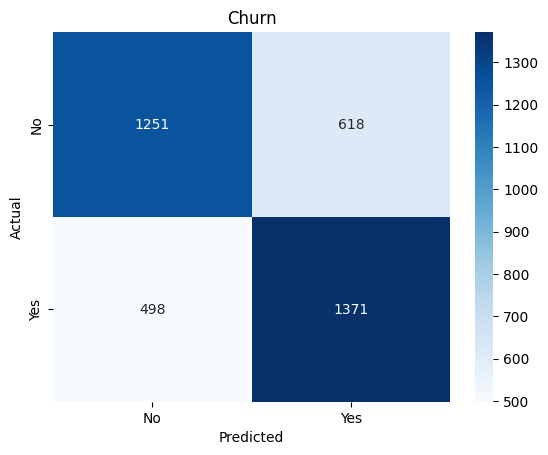

In [ ]:
cm = confusion_matrix(y_sample_fix_size , y_pred , labels=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report = classification_report(y_sample_fix_size, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.72      0.67      0.69      1869
         Yes       0.69      0.73      0.71      1869

    accuracy                           0.70      3738
   macro avg       0.70      0.70      0.70      3738
weighted avg       0.70      0.70      0.70      3738



In [ ]:
n_scores_fix.mean()

0.7014566099410761

Accuracy ต่ำลงเนื่องจากเรามีการเอาข้อมูลออก

## Over-sampling by duplication the minority class

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [ ]:
X_dup = X_resampled.values
y_dup = y_resampled.values

y_resampled.value_counts()

,count
Churn,
No,5163
Yes,5163


In [ ]:
model = tree.DecisionTreeClassifier(max_depth = ceil(log2(len(df.columns))), criterion = 'entropy', random_state = 0)
model.fit(X_dup, y_dup)
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])

# evaluate model
cv = KFold(n_splits=10)
n_scores_dup = cross_val_score(pipeline, X_dup, y_dup, cv=cv, n_jobs=-1, error_score='raise')
# fit the model on all available data
pipeline.fit(X_dup, y_dup)

Pipeline(steps=[('scaler', StandardScaler()),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=0))])

In [ ]:
y_pred = cross_val_predict(pipeline,X_dup, y_dup,cv=cv)
y_pred

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

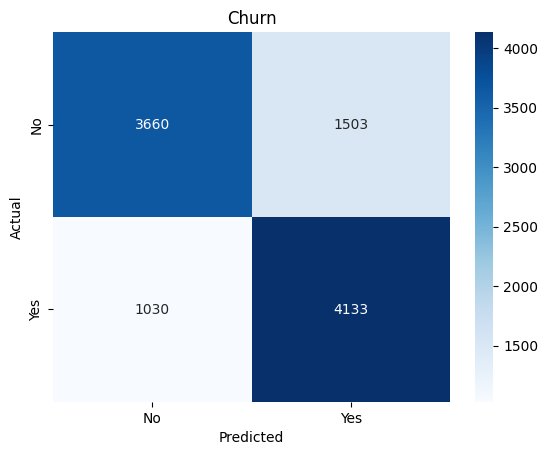

In [ ]:
cm = confusion_matrix(y_dup , y_pred , labels=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report = classification_report(y_dup, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.78      0.71      0.74      5163
         Yes       0.73      0.80      0.77      5163

    accuracy                           0.75     10326
   macro avg       0.76      0.75      0.75     10326
weighted avg       0.76      0.75      0.75     10326



In [ ]:
n_scores_dup.mean()

0.75470782022708

ให้ Accuracy ดีกว่าแบบ Sampling fixing size

## Over-sampling by SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()

,count
Churn,
No,5163
Yes,5163


In [ ]:
X_smote = X_resampled.values
y_smote = y_resampled.values

In [ ]:
model = tree.DecisionTreeClassifier(max_depth = ceil(log2(len(df.columns))), criterion = 'entropy', random_state = 0)
model.fit(X_smote, y_smote)
pipeline = Pipeline(steps=[('scaler', StandardScaler()),('m',model)])

# evaluate model
cv = KFold(n_splits=10)
n_scores_smote = cross_val_score(pipeline, X_smote, y_smote, cv=cv, n_jobs=-1, error_score='raise')
# fit the model on all available data
pipeline.fit(X_smote, y_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('m',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=0))])

In [ ]:
y_pred = cross_val_predict(pipeline,X_smote, y_smote,cv=cv)
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

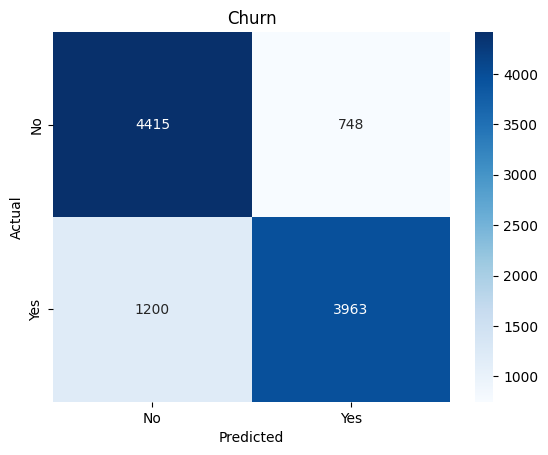

In [ ]:
cm = confusion_matrix(y_smote , y_pred , labels=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report = classification_report(y_smote , y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.79      0.86      0.82      5163
         Yes       0.84      0.77      0.80      5163

    accuracy                           0.81     10326
   macro avg       0.81      0.81      0.81     10326
weighted avg       0.81      0.81      0.81     10326



In [ ]:
n_scores_smote.mean()

0.8113694777760267

ได้ Accuracy ดีที่สุดจากทั้ง 3 วิธี

## Compare performance from the three techniques

In [ ]:
print(f'Original dataset score : {n_scores.mean()}')
print(f'Sampling fixing size score : {n_scores_fix.mean()}')
print(f'Over-sampling by duplication the minority class score : {n_scores_dup.mean()}')
print(f'Over-sampling by SMOTE score : {n_scores_smote.mean()}')

Original dataset score : 0.7908114978016293
Sampling fixing size score : 0.7014566099410761
Over-sampling by duplication the minority class score : 0.75470782022708
Over-sampling by SMOTE score : 0.8113694777760267


จะเห็นได้ว่าการทำ Oversampling แบบ SMOTE ให้ทั้งค่า precision, recall, f1-score มากกว่าทุกแบบรวมถึงแบบที่ไม่ได้ทำ sampling ด้วย เนื่องากการทำ sampling ช่วยให้การ predict imbalance data ทำได้ดีขึ้นโดยการ เติมข้อมูลที่มีน้อยกว่า ให้มีจำนวนเท่ากัน